# Radon Concentration
## Data Import

In [1]:
import requests
import pandas as pd
url = 'https://health.canada.ca/apps/open-data/radon-concentrations/radon-concentration.csv'
dfs = pd.read_csv(url)

In [2]:
dfs.shape

(13815, 13)

In [3]:
dfs.head()

,ResultNumber,ProvinceTerritory,Health Region2007,HealthRegionCode2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,127.0,20,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,108.0,36,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0E,91.0,<15,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,91.0,31,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0C,98.0,26,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfs.describe()

,ResultNumber,HealthRegionCode2007,TestDurationInDays,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,13814.000000,13814.000000,13814.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,6907.500000,3717.666932,96.680469,NaN,NaN,NaN,NaN,NaN,NaN
std,3987.902644,1544.719745,14.612814,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1011.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3454.250000,2411.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,6907.500000,3557.000000,92.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,10360.750000,4714.000000,98.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,13814.000000,6201.000000,456.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfs.dtypes

ResultNumber                          float64
ProvinceTerritory                      object
Health Region2007                      object
HealthRegionCode2007                  float64
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3     object
Unnamed: 7                            float64
Unnamed: 8                            float64
Unnamed: 9                            float64
Unnamed: 10                           float64
Unnamed: 11                           float64
Unnamed: 12                           float64
dtype: object

## Data Clensing
Here, note that the column ResultNumber is irrelevant, so we drop it.

In [6]:
dfs = dfs.drop(['ResultNumber'], axis=1)

Now we check for missing data.

In [7]:
dfs.isnull().sum()

ProvinceTerritory                         1
Health Region2007                         1
HealthRegionCode2007                      1
ForwardSortationAreaCodes                 1
TestDurationInDays                        1
AverageRadonConcentrationInBqPerM3        1
Unnamed: 7                            13815
Unnamed: 8                            13815
Unnamed: 9                            13815
Unnamed: 10                           13815
Unnamed: 11                           13815
Unnamed: 12                           13815
dtype: int64

All data is missing in the Unnamed columns, so we drop these.

In [8]:
dfs.dropna(axis=1, how='all', inplace=True)

Now we checking for rows with missing data and drop them.

In [9]:
dfs[dfs.isnull().any(axis=1)]

,ProvinceTerritory,Health Region2007,HealthRegionCode2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
13814,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dfs.dropna(inplace=True)

Final check to ensure the dataframe has no missing data.

In [11]:
dfs.isna().sum().sum()

0

We check the relation between the columns Health Region2007 and HealthRegionCode2007.

In [12]:
(dfs.groupby(['Health Region2007'])['HealthRegionCode2007'].unique().value_counts()>1).sum()

0

In [13]:
(dfs.groupby(['HealthRegionCode2007'])['Health Region2007'].unique().value_counts()>1).sum()

0

Thus HealthReggionCode2007 has a one-to-one correspondance to Health Region 2007, so we can drop the code column.

In [14]:
dfs=dfs.drop(['HealthRegionCode2007'], axis=1)

We expect that the Average Radon Concentration is numeric, however this column is of object (string) type. We check for any non-numeric entry in this column before we change the type to numeric (float64).

In [15]:
dfs[dfs['AverageRadonConcentrationInBqPerM3'].apply(lambda x: not x.isnumeric())]['AverageRadonConcentrationInBqPerM3'].value_counts()

<15    2585
Name: AverageRadonConcentrationInBqPerM3, dtype: int64

We impute 7.5 to entry with radon concentration less than 15.

In [16]:
dfs['AverageRadonConcentrationInBqPerM3'].replace('<15', 7.5, inplace=True)
dfs['AverageRadonConcentrationInBqPerM3'] = dfs['AverageRadonConcentrationInBqPerM3'].astype('float64')

Final type checking.

In [17]:
dfs.dtypes

ProvinceTerritory                      object
Health Region2007                      object
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3    float64
dtype: object

## Exploratory Data Analysis

In [18]:
dfs.head()

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,A0A,127.0,20.0
1,NL,Eastern Regional Integrated Health Authority,A0A,108.0,36.0
2,NL,Eastern Regional Integrated Health Authority,A0E,91.0,7.5
3,NL,Eastern Regional Integrated Health Authority,A0A,91.0,31.0
4,NL,Eastern Regional Integrated Health Authority,A0C,98.0,26.0


In [19]:
dfs.describe()

,TestDurationInDays,AverageRadonConcentrationInBqPerM3
count,13814.000000,13814.000000
mean,96.680469,96.434451
std,14.612814,170.463366
min,30.000000,7.500000
25%,91.000000,19.000000
50%,92.000000,47.000000
75%,98.000000,114.000000
max,456.000000,5657.000000


In [20]:
import matplotlib.pyplot as plt

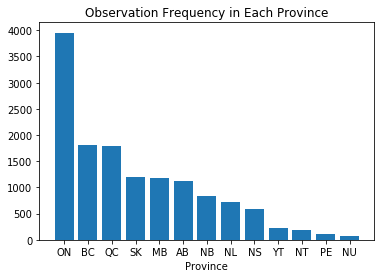

In [21]:
province = dfs['ProvinceTerritory'].value_counts()
plt.bar(province.index, province.values)
plt.xlabel("Province")
plt.title("Observation Frequency in Each Province")
plt.show()

Most oberservations are in ON, BC, and Quebec.

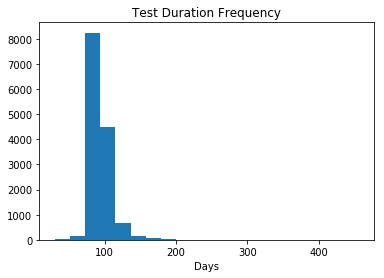

In [22]:
plt.clf()
plt.hist(dfs['TestDurationInDays'], bins=20)
plt.title("Test Duration Frequency")
plt.xlabel("Days")
plt.show()

Most observations are taken from an average of 100 days.

In [23]:
##average_days = dfs.groupby(['Health Region2007'])['TestDurationInDays'].mean()
##plt.hist(average_days)

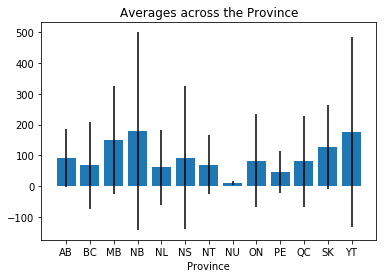

In [24]:
average_concentration = dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].mean()
std_concentration =  dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].std()
plt.bar(average_concentration.index, average_concentration.values, yerr=std_concentration)
plt.title("Averages across the Province")
plt.xlabel("Province")
plt.show()

MB, NB, SK, and YT have higher radon averages. NB and YT have high variance in radon concentration.

## Map View

In [25]:
import geopandas as gpd
can = gpd.GeoDataFrame.from_file("Map_Canada\gpr_000b11a_e.shp")

In [26]:
can['Abbv'] = pd.Series(data=['BC','QC','NU','PE','SK','YT','MB','ON','NB','NT','AB','NL','NS'])
can = can.join(average_concentration, on='Abbv')

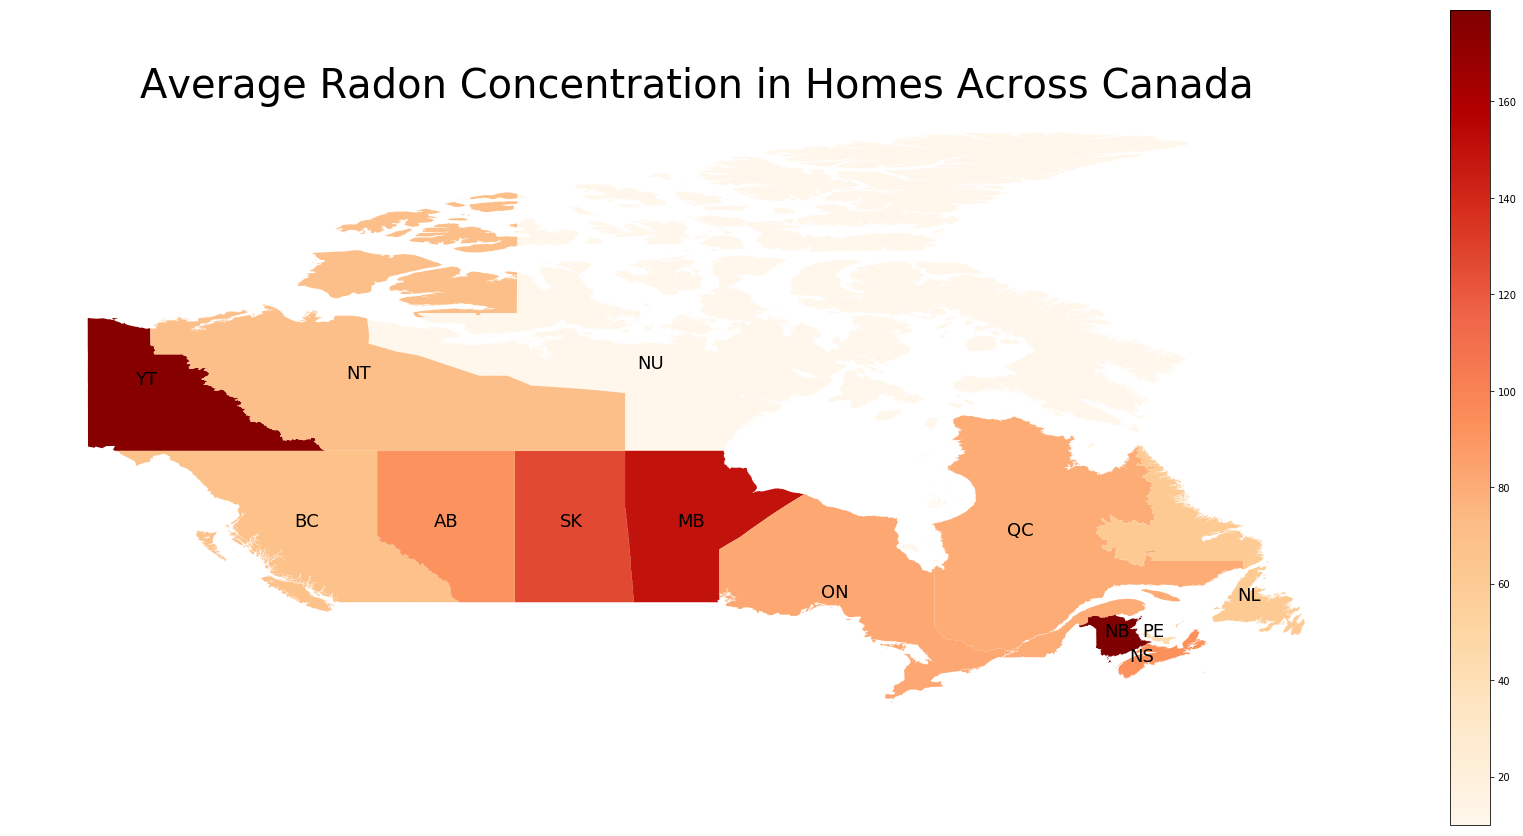

In [27]:
can.plot(column='AverageRadonConcentrationInBqPerM3', legend=True, cmap='OrRd', figsize=(30, 15))
plt.axis('off')
plt.title("Average Radon Concentration in Homes Across Canada", fontsize=40)

can['coords'] = can['geometry'].apply(lambda x: x.representative_point().coords[:])
can['coords'] = [coords[0] for coords in can['coords']]
for idx, row in can.iterrows():
    plt.annotate(s=row['Abbv'], xy=row['coords'],
                 horizontalalignment='center', fontsize=18)
plt.show()